#Mini-LA Assignment-Classification-Prediction

#Jingyuan Liang, Siyu Lin, Zhen Yan

1.Purpose
We aimed to create multiple models to predict which students are likley to drop out of which courses in the beginning of the semester in order to solve over-enrolling problems.

2.Similar work
We have used similar models and model evaluation to predict the students' on-task behavior in classrooms through examining whether specific instructional strategies are associated with incidence of off-task behavior in elementary school children.

3.Feature selection
In this project, we selected features including completeness of the course, if the student has an international status, and whether they choose the online course.

4.model implementation 
We choose logistic regression model and Naive Bayes model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import training data
drop_out = pd.read_csv("/Users/jasondeng/Desktop/drop-out.csv")
drop_out

,student_id,years,entrance_test_score,courses_taken,complete,enroll_date_time,course_id,international,online,gender
0,172777,0,47.0,4,yes,159227767,807728,no,no,1
1,172777,0,47.0,4,yes,159227782,658434,no,no,1
2,172777,0,47.0,4,yes,159227866,658463,no,no,1
3,172777,0,47.0,4,yes,159227948,658498,no,no,1
4,175658,0,92.8,22,yes,157446419,807728,no,no,1
...,...,...,...,...,...,...,...,...,...,...
5856,295097,0,0.0,3,yes,159550455,807728,no,no,2
5857,295097,0,0.0,3,no,159550594,658434,no,no,2
5858,295097,0,0.0,3,no,159551590,658463,no,no,2
5859,299198,0,0.0,2,yes,160838118,807728,no,no,2


In [3]:
# descriptive statistics
drop_out.describe()

,student_id,years,entrance_test_score,courses_taken,enroll_date_time,course_id,gender
count,5861.000000,5861.000000,5861.000000,5861.000000,5.861000e+03,5861.000000,5861.000000
mean,252955.885856,0.643917,11.429688,16.417847,1.562557e+08,697634.106808,1.664904
std,26979.616759,1.535799,19.173021,12.326306,3.630621e+06,65677.872812,0.843351
min,172777.000000,0.000000,0.000000,1.000000,1.493695e+08,658434.000000,1.000000
25%,235106.000000,0.000000,0.000000,7.000000,1.530663e+08,658439.000000,1.000000
50%,247301.000000,0.000000,1.700000,13.000000,1.561354e+08,658467.000000,2.000000
75%,282338.000000,0.000000,19.100000,22.000000,1.599236e+08,807717.000000,2.000000
max,299198.000000,10.000000,121.700000,60.000000,1.615111e+08,807758.000000,5.000000


In [4]:
from sklearn.linear_model import LogisticRegression

In [6]:
dummy = pd.get_dummies(drop_out['complete'], prefix = 'complete')
dummy

,complete_no,complete_yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
5856,0,1
5857,1,0
5858,1,0
5859,0,1


In [7]:
dummy1 = pd.get_dummies(drop_out['international'], prefix = 'international')
dummy1

,international_no,international_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5856,1,0
5857,1,0
5858,1,0
5859,1,0


In [8]:
dummy2 = pd.get_dummies(drop_out['online'], prefix = 'online')
dummy2

,online_no,online_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5856,1,0
5857,1,0
5858,1,0
5859,1,0


In [9]:
drop_outD = pd.concat([drop_out, dummy, dummy1, dummy2], axis=1)
drop_outD = drop_outD.drop(['complete', 'complete_no', 'international', 'international_no', 'online', 'online_no'], axis=1)
drop_outD

,student_id,years,entrance_test_score,courses_taken,enroll_date_time,course_id,gender,complete_yes,international_yes,online_yes
0,172777,0,47.0,4,159227767,807728,1,1,0,0
1,172777,0,47.0,4,159227782,658434,1,1,0,0
2,172777,0,47.0,4,159227866,658463,1,1,0,0
3,172777,0,47.0,4,159227948,658498,1,1,0,0
4,175658,0,92.8,22,157446419,807728,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5856,295097,0,0.0,3,159550455,807728,2,1,0,0
5857,295097,0,0.0,3,159550594,658434,2,0,0,0
5858,295097,0,0.0,3,159551590,658463,2,0,0,0
5859,299198,0,0.0,2,160838118,807728,2,1,0,0


/Users/jasondeng/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


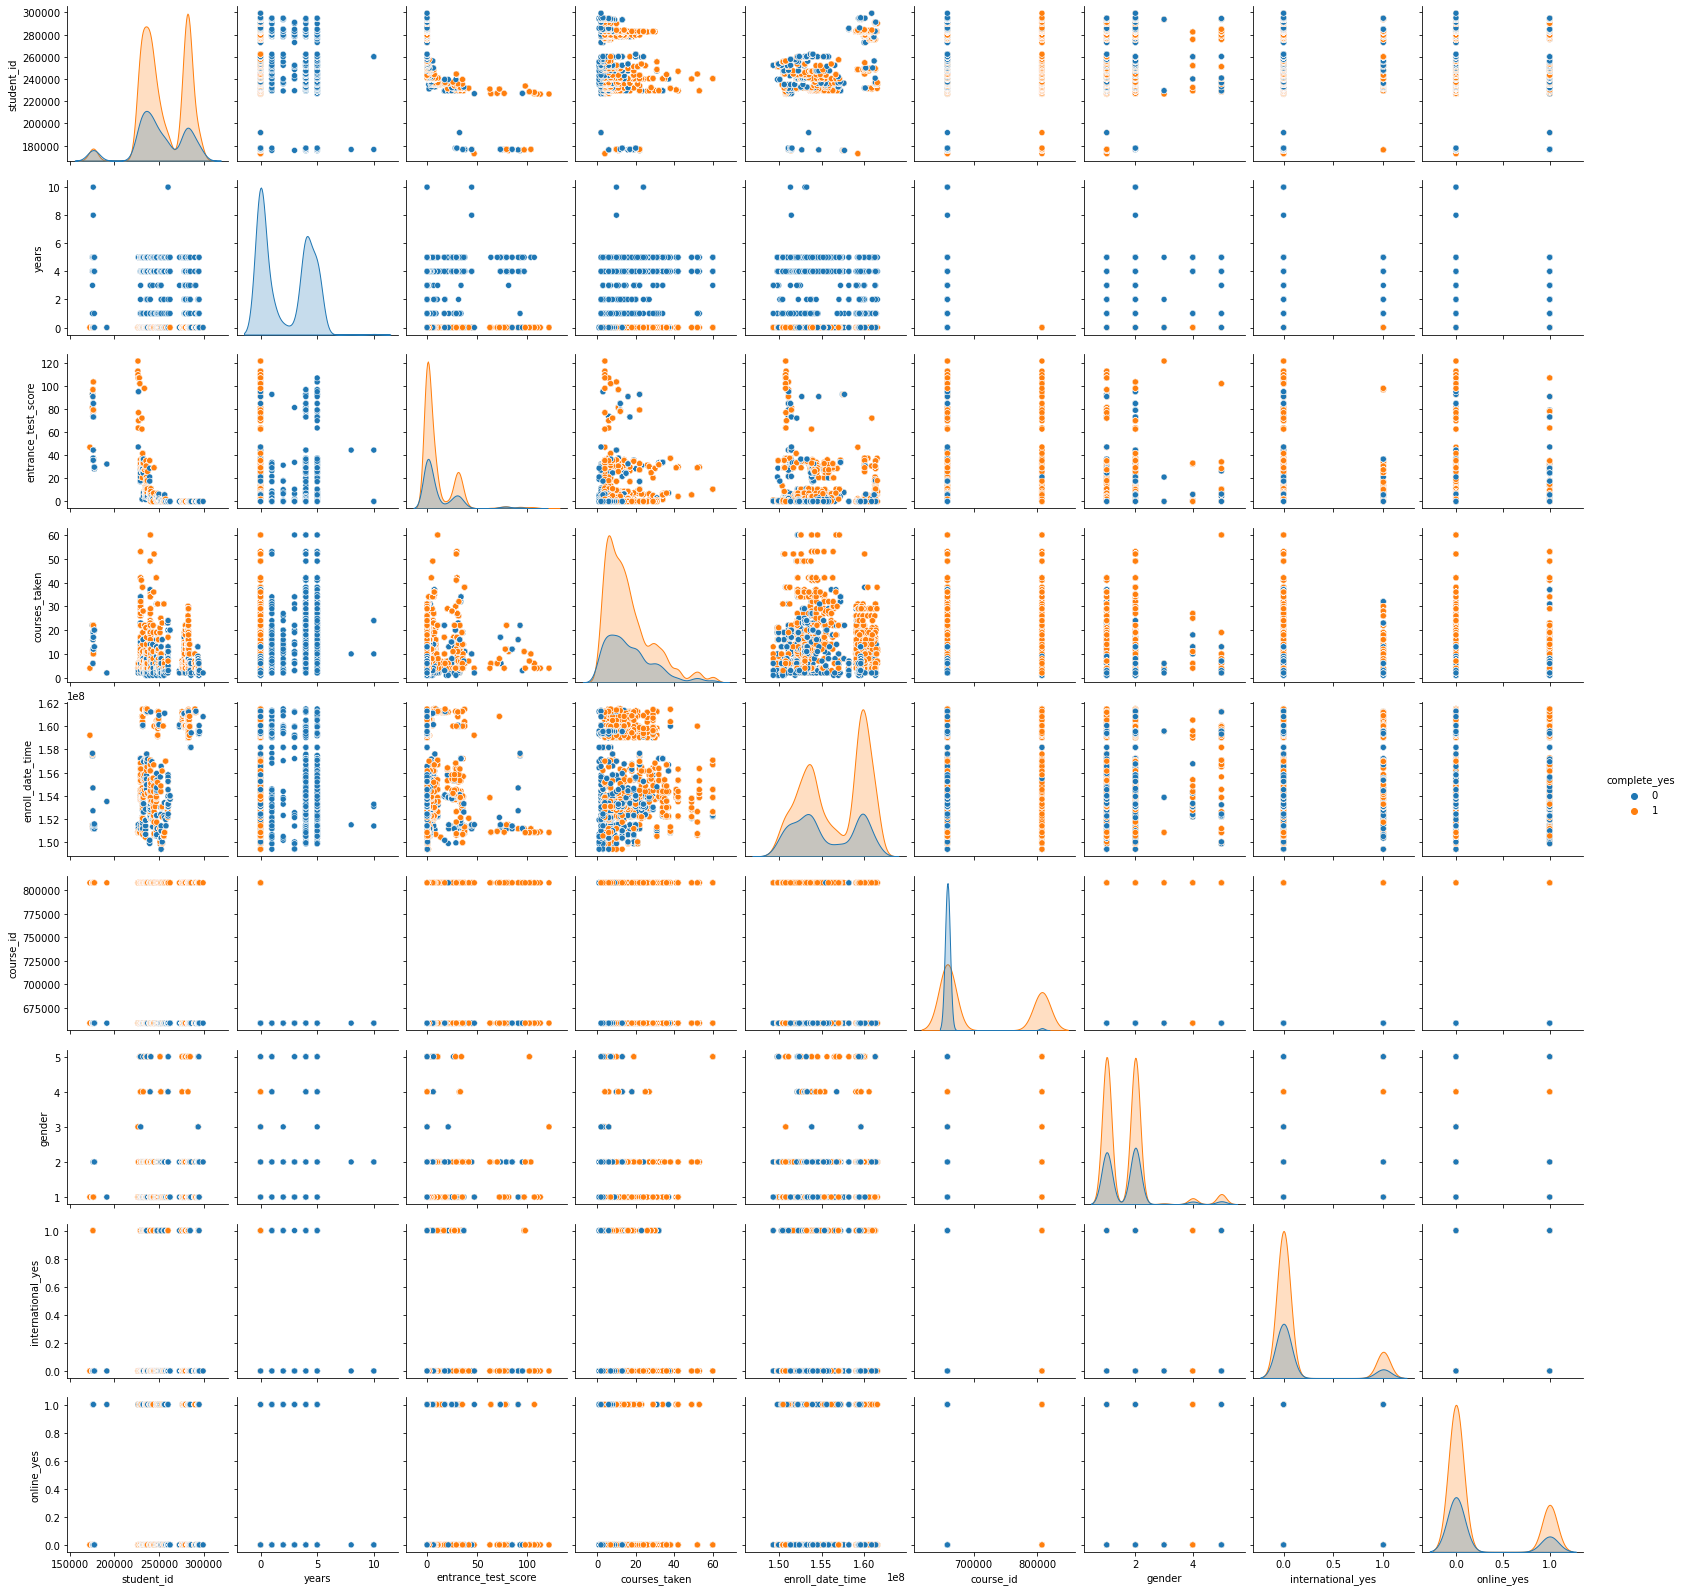

In [10]:
import seaborn as sns
sns.pairplot(drop_outD, hue = "complete_yes")

Based on the seaborn plot above, we will choose all predictors without student_id for regression. Because we don't want to leave out any of the factors that are relevant even if some variable has only a small relationship to the dependent variable. Moreover, from the plot, years and course_id have more significant relationships compared to others.

#1.logistic regression 

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
Xs = drop_outD[["years", "entrance_test_score", "courses_taken","enroll_date_time", "course_id", "gender", "complete_yes", "international_yes", "online_yes"]].to_numpy()
complete = drop_outD.loc[:,"complete_yes"].values.reshape(-1, 1)

In [14]:
drop_outLogitModel1 = LogisticRegression()
drop_outLogitModel1.fit(Xs, complete)

/Users/jasondeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [15]:
drop_outLogitModel1.intercept_

array([-2.11970356e-12])

In [17]:
drop_outLogitModel1.coef_

array([[-7.23007186e-10, -4.16222401e-10, -2.29073858e-10,
        -6.37039757e-08,  1.58905346e-05, -5.12075716e-12,
         3.28808891e-10,  3.95109040e-12,  6.82701730e-12]])

#2. Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB

Xs_NB = drop_outD.drop('complete_yes', axis = 1)
complete = drop_outD['complete_yes']

In [19]:
drop_outNBModel = GaussianNB()
drop_outNBModel.fit(Xs_NB, complete)

GaussianNB()

In [20]:
complete_pred = drop_outNBModel.predict(Xs_NB)
performance = [item in complete_pred for item in complete]
print('The accuracy is', sum(performance)/len(performance)*100, '%')

The accuracy is 100.0 %


5.Model Evaluation

Use confusion matrix.

Step 1. Split data

In [22]:
from sklearn.model_selection import train_test_split
## For logistic regression
Xs_logit = drop_outD[['years','entrance_test_score','courses_taken','enroll_date_time','course_id','gender','complete_yes','international_yes','online_yes']].to_numpy()
complete_logit = drop_outD.loc[:,"complete_yes"].values.reshape(-1, 1)
xs_logit_training, xs_logit_test, y_logit_training, y_logit_test = train_test_split(Xs_logit, complete_logit, test_size = 0.2)

## For Naive Bayes
Xs_T = drop_outD.drop('complete_yes', axis = 1)
complete_T = drop_outD['complete_yes']
xs_T_training, xs_T_test, y_T_training, y_T_test = train_test_split(Xs_T, complete_T, test_size = 0.2)


Step 2. Re-train the model with just the training data.

In [25]:
drop_outLogitModel1 = LogisticRegression()
drop_outLogitModel1.fit(Xs, complete)

drop_outNBModel1 = GaussianNB()
drop_outNBModel.fit(xs_T_training,y_T_training)

GaussianNB()

Step 3. Feed the Xs in the testing dataset and obtain the predicted Ys.

In [26]:
complete_pred_logit1 = drop_outLogitModel1.predict(xs_logit_test)
complete_pred_NB = drop_outLogitModel1.predict(xs_T_test)

Step 4.obtain the confusion matrix.

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y_logit_test, complete_pred_logit1))

[[  0 347]
 [  0 826]]


In [29]:
print(confusion_matrix(y_T_test, complete_pred_NB))

[[  0 336]
 [  0 837]]


obtaining accuracy score 

In [30]:
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_logit_test, complete_pred_logit1)
ac_NB = accuracy_score(y_T_test, complete_pred_NB)

print("The accuracy for logistic regression in sklearn is", ac_logit1*100, "%")
print("The accuracy for naive bayes", ac_NB*100, "%")

The accuracy for logistic regression in sklearn is 70.41773231031543 %
The accuracy for naive bayes 71.35549872122762 %


6.compare, and constrast the model performance
we used the logistic regression to build the classifier. The coefficients the model calculated can indicate the relationship of each variable that make the impacts in the model. According to the results, course_id, complete_yes, international_yes, online_yes have positive coefficients. In particular, online_yes has the greatest influence on model result. It makes sense that students will not be willing to complete the online courses. years, entrance_test_score, courses_taken, enroll_date_time, and gender have negative coefficients. Specifically, gender is the most significant variable among the variables that have negative coefficients. It is true that gender tends to be irrelevant to degree of course completion.  

Then we compared the Ys predicted by the model with validated data. The accuracy for logistic regression is about 70.42% and the accuracy of naive bayes is about 71.36%, which is not bad. 
Compared to confusion_matrix and accuracy in Sklearn, the precision of both methods are similar. And we think there is no one exact method that fits with these metrics and each metric is important in its own way. We can provide different methods depending on classification model performance.

7.advantages/disadvantages 
  For the model we use, both Logistic regression and Bayes are linear classifiers. Logisitc regression acts similar to linear regression, it is a classification model that calculates the linear output. Its advantages are easy and simple to use, can also be used for multiclass classification. But it requires to select proper features, colinearity and outliers tampers the accurancy of the model. Bayes is a generative model that is adaptive to high-dimensional datasets. Naive bayes works well with small datasets compared to logistic regression. Both models work in our case, the model evaluations show that the accurancy of the naive bayes model is slightly higher than the logistic regression model.